In [119]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [120]:
# default seaborn setup
sns.set()

In [1]:
# load data
df = load_breast_cancer()
df

NameError: name 'load_breast_cancer' is not defined

In [122]:
# standar scaling for brest cancer data
scaler = StandardScaler()
scale_data = scaler.fit_transform(df.data)
scale_data.shape


(569, 30)

In [123]:
# 2 components PCA for scaled brest cancer data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scale_data)
# pca_data
pca_components = pca.components_

In [124]:
print('Original Shape: ', scale_data.shape)
print('Reduced shape: ', pca_data.shape)
print('PCA component shape: ', pca_components.shape)
pca_components

Original Shape:  (569, 30)
Reduced shape:  (569, 2)
PCA component shape:  (2, 30)


array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

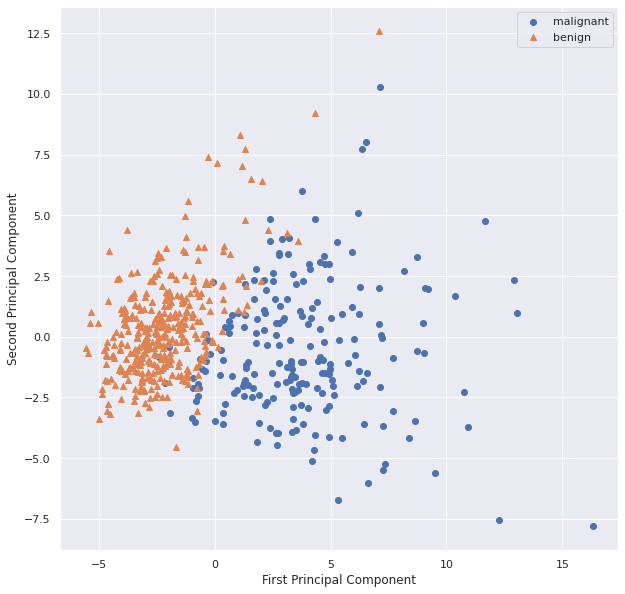

In [125]:
fig, ax = plt.subplots(figsize=(10, 10))

# scatter the First and second PCA components for malignant category data
ax.scatter(pca_data[df.target==0, 0], pca_data[df.target==0, 1], label='malignant')
# scatter the First and second PCA components for benign category data
ax.scatter(pca_data[df.target==1, 0], pca_data[df.target==1, 1], marker='^', label='benign')
# set xlabel
ax.set_xlabel('First Principal Component')
# set ylabel
ax.set_ylabel('Second Principal Component')
# set legend
ax.legend()
# save figure
fig.savefig('task_8_1_1')

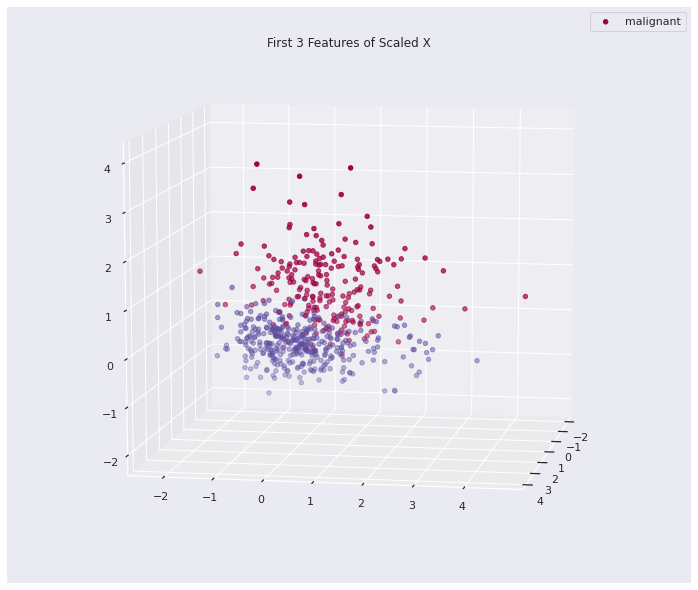

In [126]:
fig = plt.figure(figsize=(10, 8))
# colormap
cmap = plt.cm.get_cmap("Spectral")
# create 3D plot
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=10)
# scatter plot in 3D spae
ax.scatter(scale_data[:, 0], scale_data[:, 1], scale_data[:, 2], c= df.target, cmap=cmap, label='malignant')
# set title
ax.set_title('First 3 Features of Scaled X')
# set legend
ax.legend()
# save fig
fig.savefig('task_8_1_2')

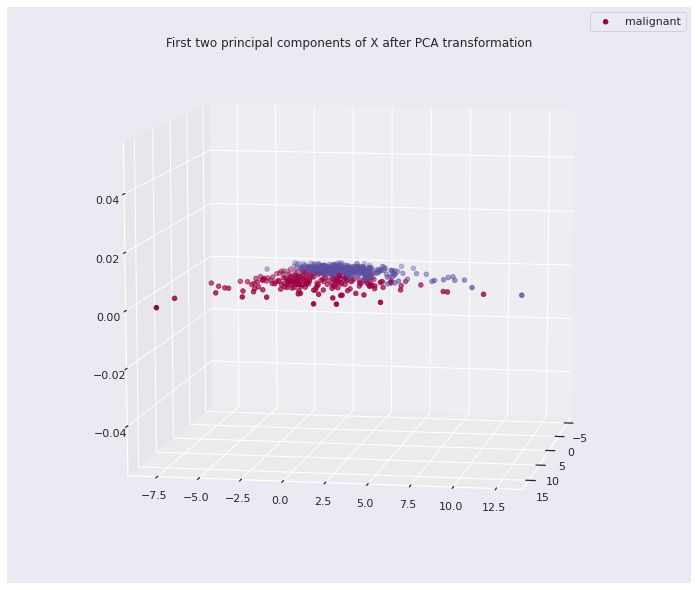

In [127]:
fig = plt.figure(figsize=(10, 8))
# colormap
cmap = plt.cm.get_cmap("Spectral")
# create 3D plot
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=10)
# scatter plot the first PCA component in xaxis and second PCA component in y axis
ax.scatter(pca_data[:, 0], pca_data[:, 1], c=df.target, cmap=cmap, label='malignant')
# set title
ax.set_title('First two principal components of X after PCA transformation')
# set legend
ax.legend()
# save figure
fig.savefig('task_8_1_3')